In [1]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import hsv_to_rgb

# Load video

#trailer_name_list = ['avatar', 'moana', 'dark forest', 'island']

color_dict = {}

In [2]:
def plot_movie_colors_3d(trailer_name_list, resize_dim=(64, 36)):

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    for name in trailer_name_list:
        cap = cv2.VideoCapture(f'{name}.mp4')
        average_colors_hsv = []

        while True:
            ret, frame = cap.read()
            if not ret:
                break

            if name == 'moana': frame = frame[138:942,:]
            if name == 'avatar': frame = frame[94:627,:]
            if name == 'barbie': frame = frame[60:1020,:]

            frame = cv2.resize(frame, resize_dim) 
            rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            rgb_normalized = rgb / 255.0  # Normalize to [0, 1]
            hsv = matplotlib.colors.rgb_to_hsv(rgb_normalized)
            avg_hsv = hsv.mean(axis=(0, 1))
            average_colors_hsv.append(avg_hsv)
        
        cap.release()
        
        
        average_colors_hsv = np.array(average_colors_hsv) #(no. of frames, 3) 
        h, s, v = average_colors_hsv[:, 0], average_colors_hsv[:, 1], average_colors_hsv[:, 2]
        colors_rgb = hsv_to_rgb(average_colors_hsv)

        ax.scatter(h, s, v, s=5, alpha=0.5, label=name)
        
    ax.set_xlabel("Hue")
    ax.set_ylabel("Saturation")
    ax.set_zlabel("Value")
    ax.set_title("Average HSV Color per Frame (Colored by HSV)")
    
    ax.legend()
    plt.tight_layout()
    plt.show()

def plot_movie_colors(trailer_name_list, resize_dim=(64, 36)):
    # Plotting
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    for name in trailer_name_list:
        cap = cv2.VideoCapture(f'{name}.mp4')
        average_colors_hsv = []

        while True:
            ret, frame = cap.read()
            if not ret:
                break

            if name == 'moana': frame = frame[138:942,:]
            if name == 'avatar': frame = frame[94:627,:]
            if name == 'barbie': frame = frame[60:1020,:]

            frame = cv2.resize(frame, resize_dim) 
            rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            rgb_normalized = rgb / 255.0  # Normalize to [0, 1]
            hsv = matplotlib.colors.rgb_to_hsv(rgb_normalized)
            avg_hsv = hsv.mean(axis=(0, 1))
            average_colors_hsv.append(avg_hsv)
        
        cap.release()

        
        average_colors_hsv = np.array(average_colors_hsv) #(no. of frames, 3) 
        h, s, v = average_colors_hsv[:, 0], average_colors_hsv[:, 1], average_colors_hsv[:, 2]
        colors_rgb = hsv_to_rgb(average_colors_hsv)
        
        # Hue vs Saturation
        axs[0].scatter(h, s, s=2, label=name)
        axs[0].set_xlabel('Hue')
        axs[0].set_ylabel('Saturation')
        axs[0].set_title('Hue vs Saturation')
        
        # Hue vs Value
        axs[1].scatter(h, v, s=2, label=name)
        axs[1].set_xlabel('Hue')
        axs[1].set_ylabel('Value')
        axs[1].set_title('Hue vs Value')
        
        # Saturation vs Value
        axs[2].scatter(s, v, s=2, label=name)
        axs[2].set_xlabel('Saturation')
        axs[2].set_ylabel('Value')
        axs[2].set_title('Saturation vs Value')

    ax.legend()
    plt.suptitle(f"{name} Movie Trailer Color Distribution")
    plt.tight_layout()
    plt.show()

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import adjusted_rand_score, silhouette_score

def compare_movie_colors_3d(trailer_name_list, n_clusters=2, resize_dim=(64, 36)):

    cap = cv2.VideoCapture(f'{trailer_name_list[0]}.mp4')
    average_colors_hsv = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame = cv2.resize(frame, resize_dim) 
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        rgb_normalized = rgb / 255.0  # Normalize to [0, 1]
        hsv = matplotlib.colors.rgb_to_hsv(rgb_normalized)
        avg_hsv = hsv.mean(axis=(0, 1))
        average_colors_hsv.append(avg_hsv)
    
    cap.release()

    movie1_hsv = np.array(average_colors_hsv)

    cap = cv2.VideoCapture(f'{trailer_name_list[1]}.mp4')
    average_colors_hsv = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break
            
        frame = cv2.resize(frame, resize_dim) 
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        rgb_normalized = rgb / 255.0  # Normalize to [0, 1]
        hsv = matplotlib.colors.rgb_to_hsv(rgb_normalized)
        avg_hsv = hsv.mean(axis=(0, 1))
        average_colors_hsv.append(avg_hsv)
    
    cap.release()

    movie2_hsv = np.array(average_colors_hsv)

    
    # Combine data and true labels
    X = np.vstack([movie1_hsv, movie2_hsv])  # shape (N1+N2, 3)
    labels_true = np.array([0] * len(movie1_hsv) + [1] * len(movie2_hsv))

    # Run K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)

    # Calculate metrics
    ari = adjusted_rand_score(labels_true, cluster_labels)
    sil = silhouette_score(X, cluster_labels)
    print(f"Adjusted Rand Index: {ari:.3f}")
    print(f"Silhouette Score: {sil:.3f}")

    # Convert HSV to RGB for true color
    colors_rgb = hsv_to_rgb(X)

    # Plot: Cluster view
    fig = plt.figure(figsize=(14, 6))

    ax1 = fig.add_subplot(121, projection='3d')
    scatter1 = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=cluster_labels, cmap='Set1', s=20)
    ax1.set_xlabel('Hue')
    ax1.set_ylabel('Saturation')
    ax1.set_zlabel('Value')
    ax1.set_title('K-Means Cluster Labels')

    # Plot: True movie source view
    ax2 = fig.add_subplot(122, projection='3d')
    scatter2 = ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels_true, cmap='coolwarm', s=20)
    ax2.set_xlabel('Hue')
    ax2.set_ylabel('Saturation')
    ax2.set_zlabel('Value')
    ax2.set_title('True Movie Source Labels')

    plt.tight_layout()
    plt.show()


Adjusted Rand Index: 0.647
Silhouette Score: 0.442


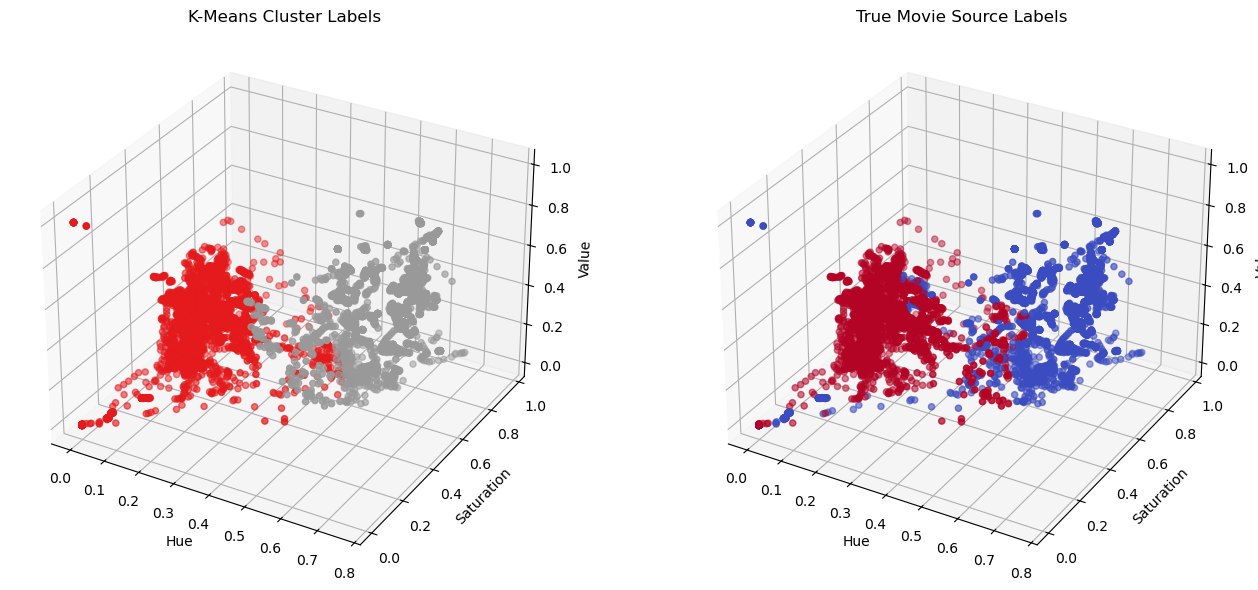

In [3]:
trailer_name_list = ['frozen', 'madmax']
compare_movie_colors_3d(trailer_name_list, resize_dim=(64, 36))

NameError: name 'ax' is not defined

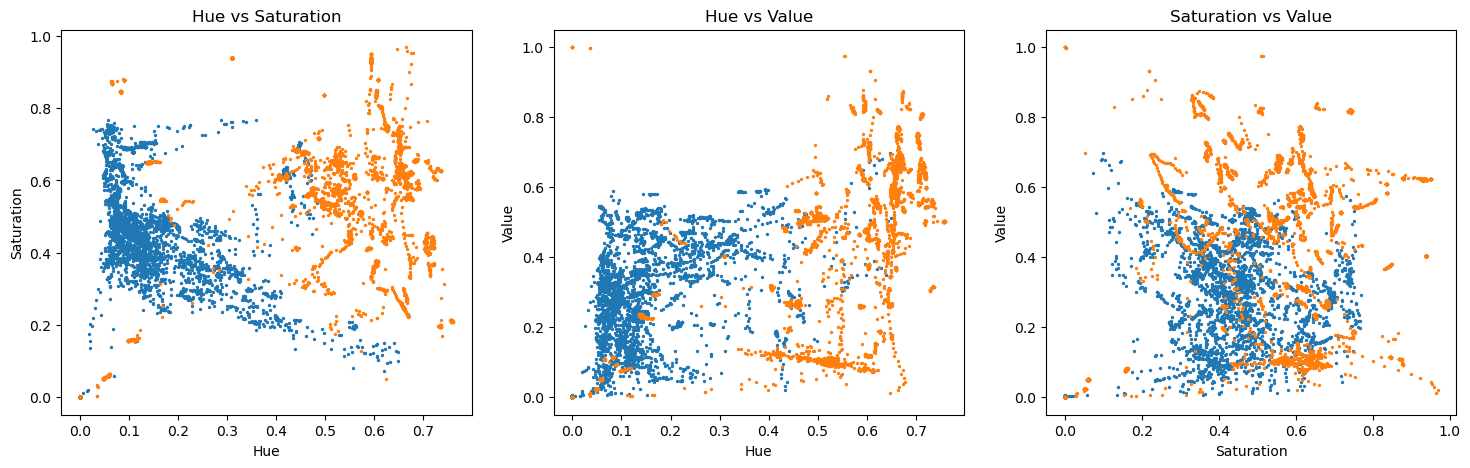

In [4]:
trailer_name_list = ['madmax', 'frozen']
#plot_movie_colors_3d(trailer_name_list, resize_dim=(64, 36))
plot_movie_colors(trailer_name_list, resize_dim=(64, 36))

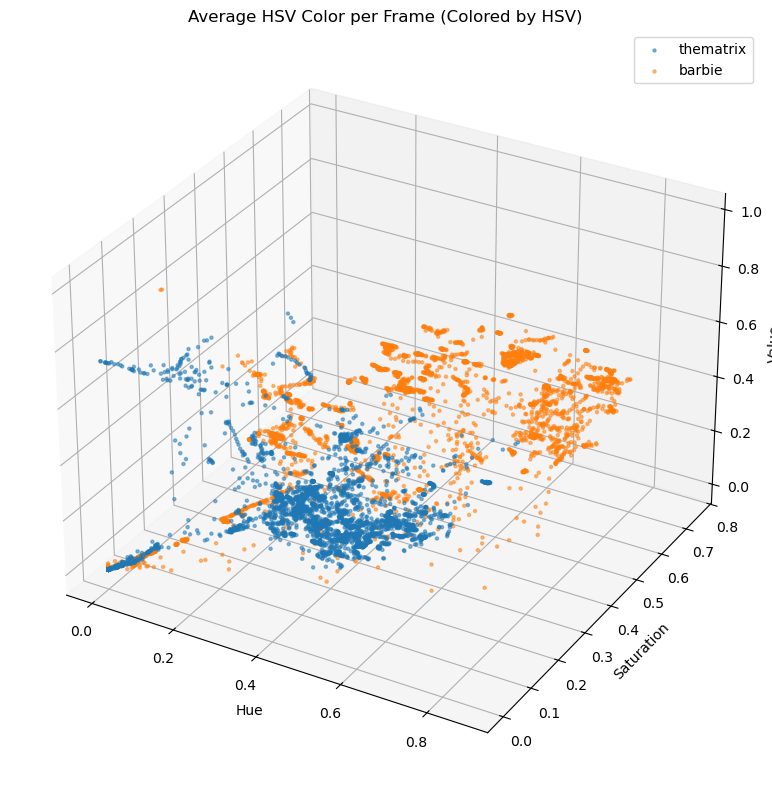

In [ ]:
trailer_name_list = ['thematrix', 'barbie']
plot_movie_colors_3d(trailer_name_list, resize_dim=(64, 36))

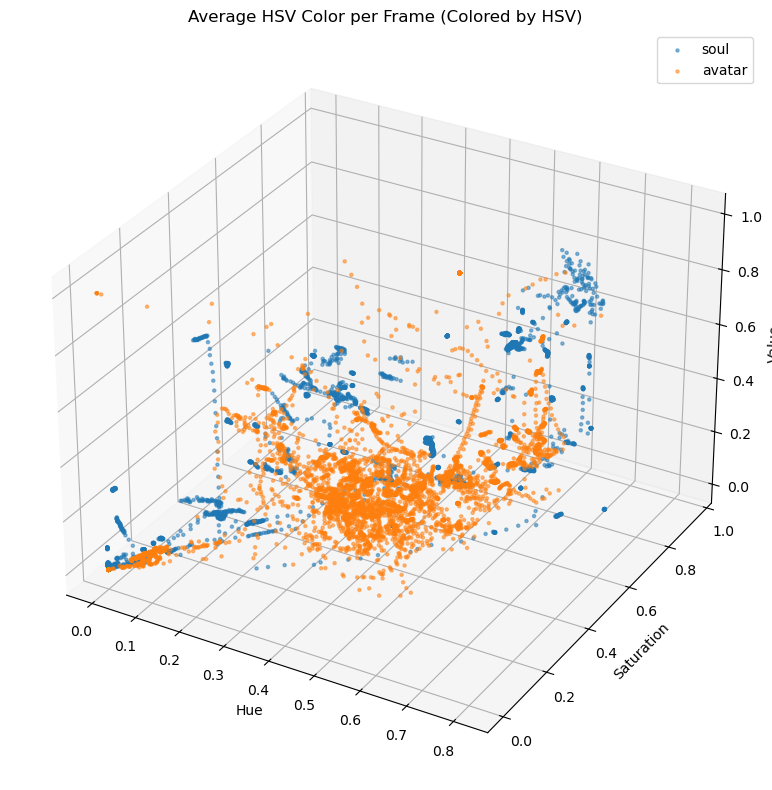

In [ ]:
trailer_name_list = ['soul', 'avatar']
plot_movie_colors_3d(trailer_name_list, resize_dim=(64, 36))

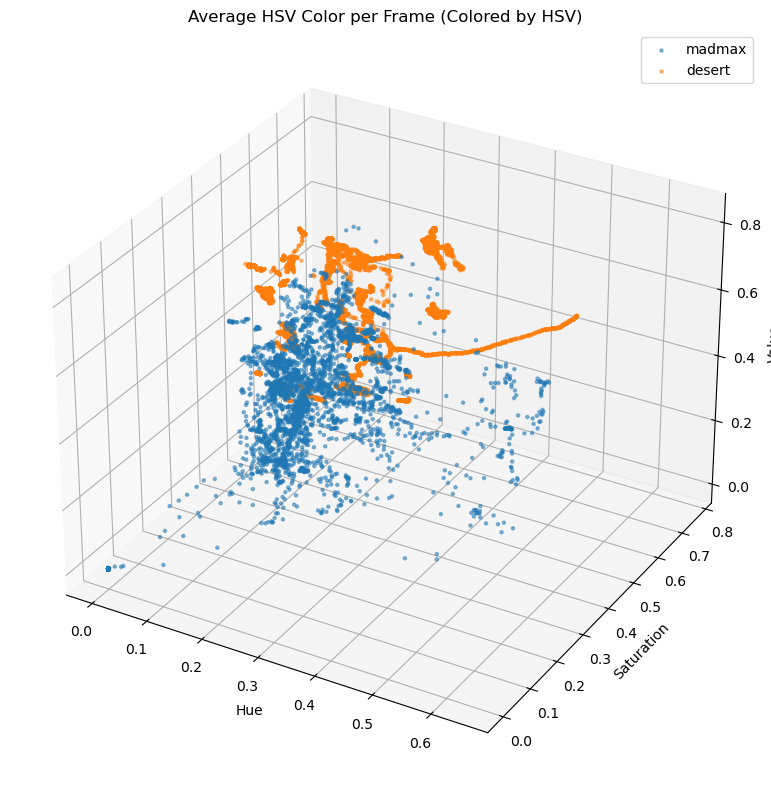

In [ ]:
trailer_name_list = ['madmax', 'desert']
plot_movie_colors_3d(trailer_name_list, resize_dim=(64, 36))